# Project Overview

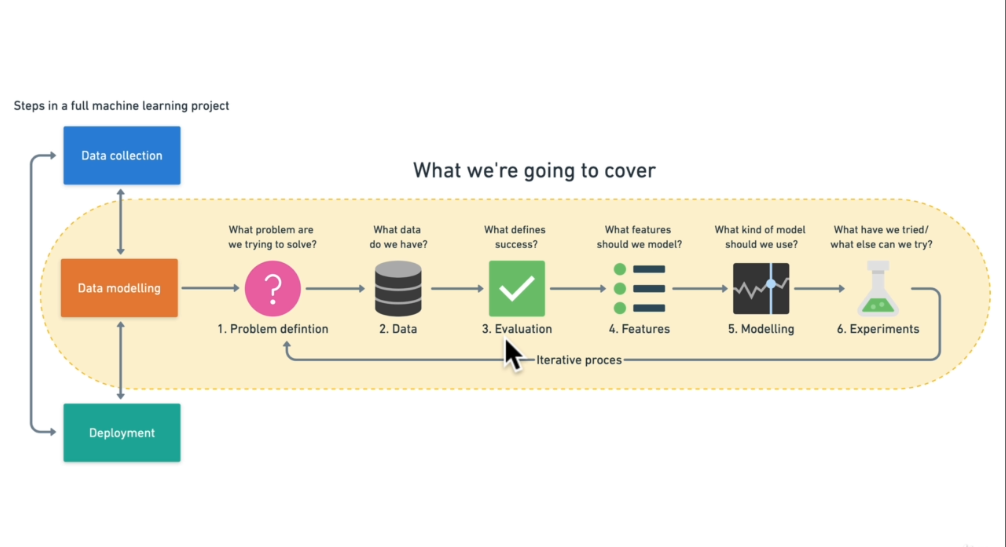

Project Environment Setup

### 1st Method

**How to export env from conda** 

`conda env export > environment.yml (Enter <-')`

**To create same environment as previous:-**
Deactivate the courrent environment and go to the folder in which to want to create new environment


`conda env create --prefix ./env -f(file) (path of .yml folder)`


### 2nd Method

Go the the path in which you want to create a new environmetn and type

`conda env create --prefix ./env pandas scikit-learn numpy matplotlib seaborn jupyter`
                               

To check all the environment that present in your device

`conda env list`

# Step 1~4 Framework Setup

## Predicting heart disease usign machine learning 

This notebook looks into using variour Python-based machine learning and data scince libararies in an attempt to build a machine learning model capabel of predicting  wheterh or not someone has heart disease based on their medical attributes



**We're going to take the following approach:**

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement 

> Given clinical parameter about a patient, can we predict whether or not they have heart disease?

## 2. Data

>The original dat came from the Cleaveland data from UCI machine learning Repository(link)

>Their is another version of it available on kaggel(link)

## 3. Evaluation

> If we can reach 95% accuracy at predicting weheather of not a patient has heart disiase during the proof of concep, we'll pursue the project

## 4. Features

This is where you'll get differnt information about each of the fearture in your data.

**Crate a data dictionary**
(you can create by your self or an organization will give it to you)
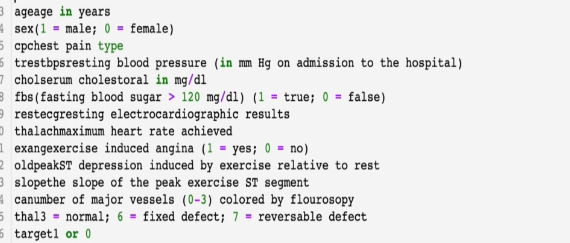

#  Getting Our Tools Ready

### Preparing the tools

We're going to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [12]:
# Import all the tools we need

# Regular EDA(Exploratory Data Analysis) and plotting libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# we want our plots to appear inside the notebook

# Models form Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Exploring Our Data

# Load Data

In [14]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# checking the shape of our data

df.shape #(rows, columns)

(303, 14)

## Data Exploration (exploratory Data Analysis or EDA)

The goal here is to find out more about the daat and become a subject matte expert on teh dataset you're working with.


**Next Phase -> EDA**

`Steps involves`

1. What question(s) are you trying to solve?
2. What kind of datta do we have and how do we treat diffrent types?
3. What's missing from teh data as how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of you data

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [19]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

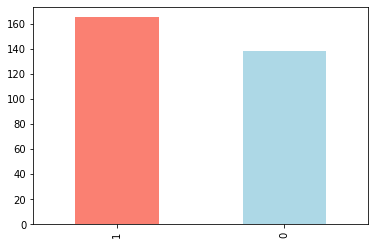

In [23]:
df["target"].value_counts().plot(kind ="bar", color=["salmon", "lightblue"]);

In [25]:
# Information about our data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
# Checking the missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Finding Patterns

### Heart Disease Frequency according to Sex

In [32]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [34]:
# Compare target column with sex column 

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


`From above data we can say that womens are more prone to the heart disease as compare to men`

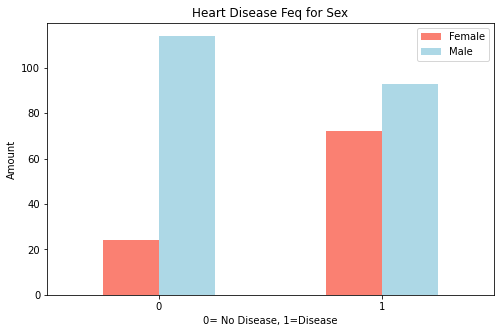

In [83]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                   figsize=(8,5),
                                   color=["salmon","lightblue"])

plt.title("Heart Disease Feq for Sex")
plt.xlabel("0= No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # text on x axis horizontal 0 to vertical 0

` The ratio of female having heart disease and not having heart disease are far more greater than that of male polation (remeber this infernce only based on our given dataset)`

# Finding Patterns 2

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
# checking the thalach column
df["thalach"].value_counts() # gives differnt values in thalach column

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Note :

Here we trying to check how differnt columns are realated to each other

### Age Vs. Max Heart Rate for Heart Disease

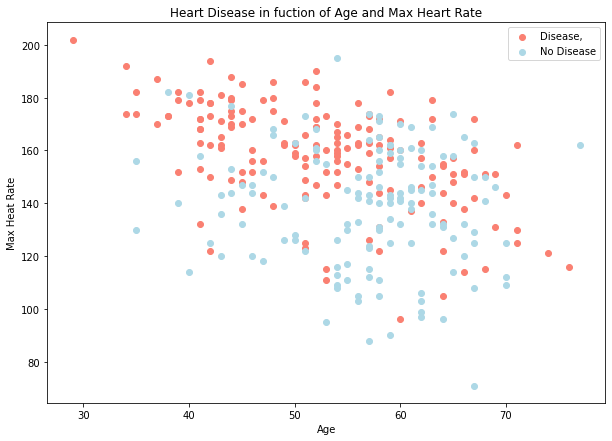

In [62]:
# Create another figure
plt.figure(figsize=(10,7))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], # equivaten to df["age"] we can use . if column name dosent have spaces
           df.thalach[df.target==1], # this == means select those columns which have target == 1 here we picking up the column with the condition
           c="salmon")

# Sacatter with the negative examples

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Add some helful info

plt.title("Heart Disease in fuction of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heat Rate")
plt.legend(["Disease,", "No Disease"]);

**What is scatter plot signifies ?**

There is downward trend in scatter plot-> means the younger someone is the higher will be their heart rate

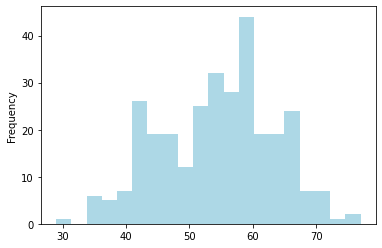

In [78]:
## Check the distribution of the age column with a histogram

df.age.plot.hist(bins =20, color = "lightblue"); # also called spred of data 

### Heart Disease Fequency per Chest Pain Type

In [80]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


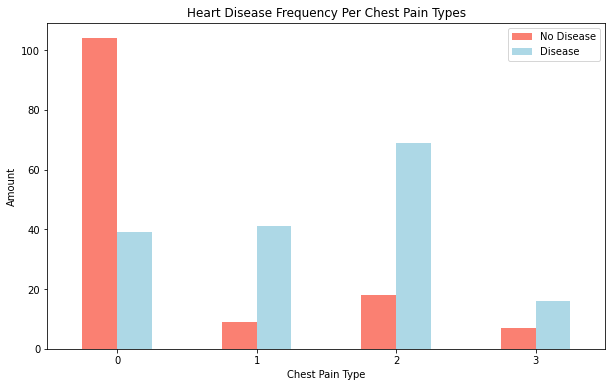

In [85]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

# Add Some communication
plt.title("Heart Disease Frequency Per Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation =0);

# Finding Patterns 3

### Building a correlation matrix

**What is a correlation matrix ?**

`It's big title of numbers telling us how each independent variable are related to each other`

In [86]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
# Make a correlation matrix
df.corr().head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


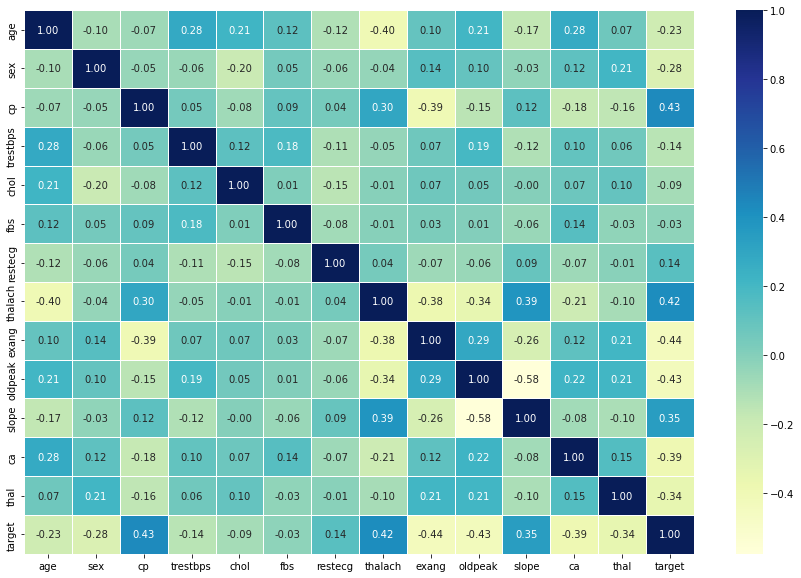

In [91]:
# let's make our correlattion matrix a littel prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths = 0.5,
                fmt=".2f",
                cmap= "YlGnBu")

`A higher positive value means a higher positive correlation and a higher negative value means a polential negative correlation`

* `Positve Correlation` -> means directly proportional
* `negative correlation` -> means inversly proportional

# Preparing Our Data For Machine Learning

### 5. Modelling

In [94]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
# Split our data into features and target set

X =df.drop("target", axis=1)
y=df["target"]

# Setup random seed
np.random.seed(42)

# Splitting the data into train and test features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learnig model

We'll train it (find the patterns) on the trainig set

And we'll test it (use the patterns) on the test set.

# Choosing The Right Models

We're going to try 3 machine learning models

1. Logistic Regression
2. K-NearestNeighbors Clssifiers
3. RandomForestClssifier

In [110]:
# Put models in a dictionay

models= {"Logistic Regression" : LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

# Create a fuction to fit score models
def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
     Fits and evaluate givem machine learning models.
     models: a dict of differnt Scikit-Learn machine learning models
     X_train: trainning data (no Labels)
     X_test: testing data (no labels)
     y_train: training labels
     y_test: test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionatry to keep model scores
    model_score={}
    #Loop though models
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train, y_train)
        # Evaluate the model and append its  score to model scores
        model_score[name]= model.score(X_test, y_test)
    return model_score

# Experimenting With Machine Learning Models

In [111]:
# Calling our fuctions
model_scores = fit_and_score(model= models,
                            X_train = X_train,
                            X_test= X_test,
                            y_train= y_train,
                            y_test = y_test)

model_scores

C:\Users\ay569\Downloads\ML_Data_Analysis\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model_comparison

<AxesSubplot:>

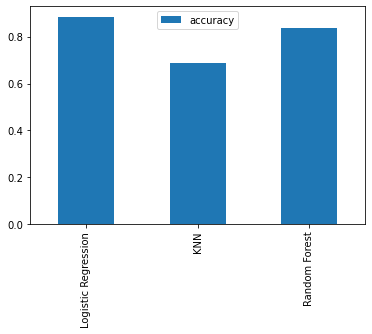

In [117]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar() # tranpose because plot group columns and seprate rows

In [114]:
model_compare.T

,accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.836066


# Tuning Improving Our Model

`Now we've got baseline model.. and we know a model's first prediction aren't always what we should based our next steps off. What should we do?`

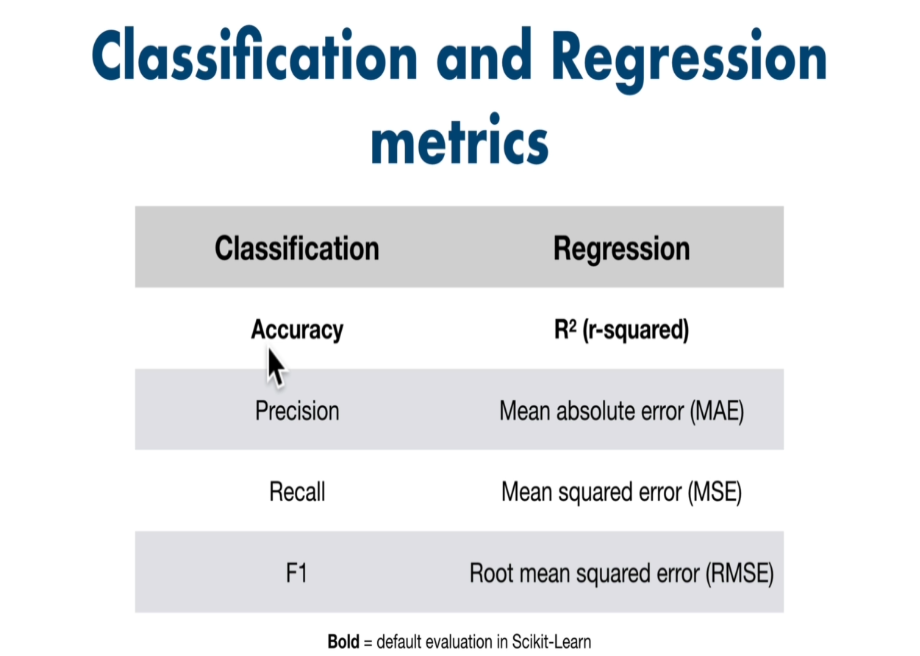

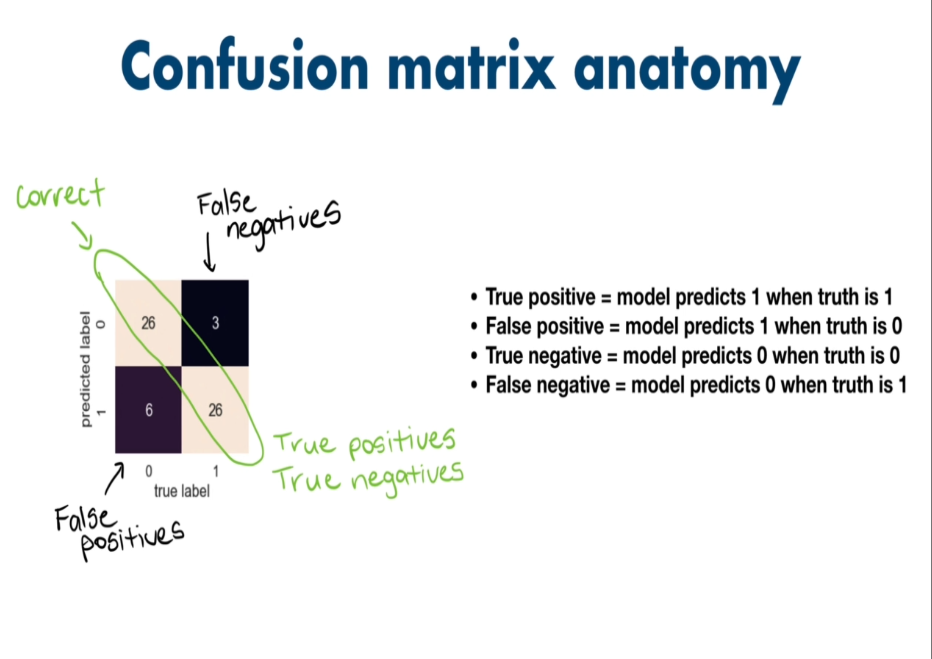

 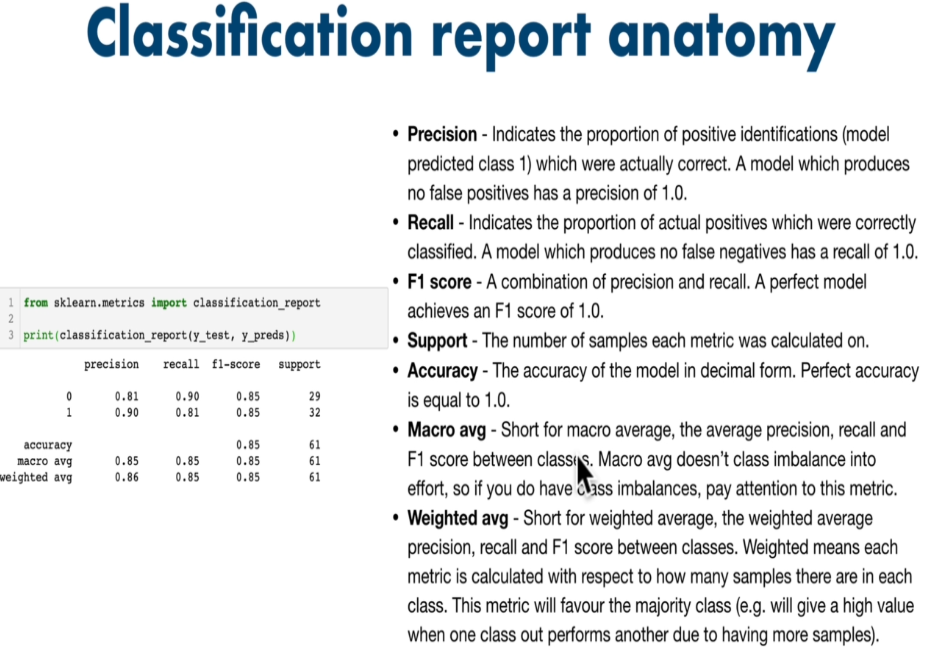

Let's Look out the following:

* `Hyperparameter tuning`
* `Feature importance `
* `Confusion matrix`
*` Cross-validation`
* `Precision`
* `Recall`
*` F1 score`
* `Classfication raport`
* `ROC Curve`
* `Area under the curve (AUC)`

## Hyperparemeter tuning by Hand

**Let's tune KNN**

In [121]:
# Tuning KNN

train_scores =[]
test_scores = []

# Create a list of different values for n_nighbors
neighbors = range(1, 21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop thourgh different n_neigbours
for i in neighbors:
    knn.set_params(n_neighbors=i) # used to modify hyper parameters
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the tes scores list
    test_scores.append(knn.score(X_test, y_test))
    

In [134]:
train_scores[:5]

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967]

In [133]:
test_scores[:5]

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344]

Maximum KNN score on the test data :75.41%


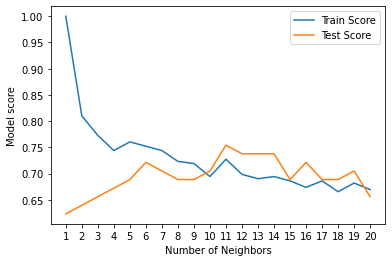

In [132]:
plt.plot(neighbors, train_scores, label= "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")

plt.xticks(np.arange(1,21)) # customize the scale of x axis

plt.xlabel("Number of Neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data :{max(test_scores)*100:.2f}%")

`After Experimentaion and hyperparameter tuning we only able to achieve 75% accuracy which is far below that what we have founded so now it's time to dicard KNN for our pridiction`

# Tuning Hyperparameters

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomoForestClassifier()

... Using RandomizedSearchCV

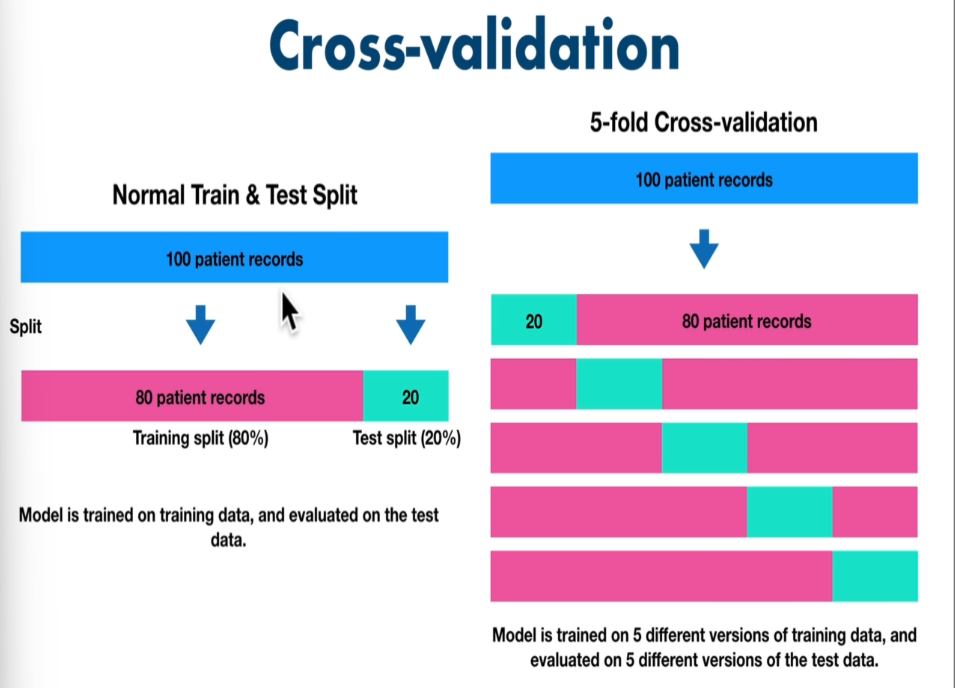

In [152]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid  ={"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

# Tuning Hyperparameters 2

`Now we've got hyperparameter grid setup for each of our models,
let's tune them using RandomizedSearchCV`

In [143]:
# Tune Logistic Regression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                             param_distributions = log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True) # means show some output

# Fit random hyperparameter searach model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [144]:
# Seeding the best parameters

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [146]:
# checking the model agints best parameters
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForessetClassifier

In [153]:
# Setup random seed
np.random.seed(42)

# Setup random hyperarameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions= rf_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose =True)

# Fit random hyperparameter search model for RandomForestClassifier()

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [155]:
# Finding the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [157]:
# Evaluate the randomized search RandomForestClassifier model

rs_rf.score(X_test, y_test)

0.8688524590163934

In [158]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Tuning Hyperparameters 3

## Hyperparameter tuning with GridSearcCV

Since our LogisticRegression model provids the best scores so far, we'll try and improve them again usin GridSearchCv..

In [171]:
# Differnt hyperparameters for our LogisticRegression model 

log_reg_grid ={"C":np.logspace(-4,4,100),
               "solver": ['liblinear']}


# Setup grid hyperparameter search for LogistiRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv = 5,
                         verbose = True)


# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.848035...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [172]:
# checking the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20565123083486536, 'solver': 'liblinear'}

In [173]:
# Evaluating our logistic regression model 
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# Evaluating Our Model

## Evaluatin our tuned machine learnig classifeir, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

.. and it would be great if cross-validation was used where possible


To make comparision and evaluater our  trained model, first we need to make predictons

In [176]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)

In [182]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [180]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

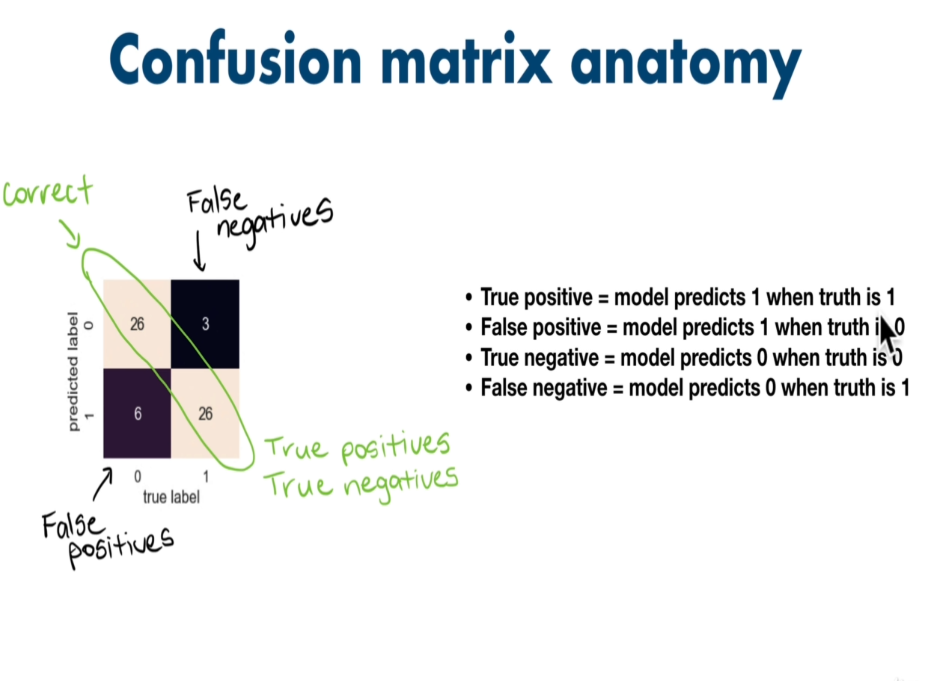

## Plot ROC curve and calculate AUC metrics

C:\Users\ay569\Downloads\ML_Data_Analysis\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


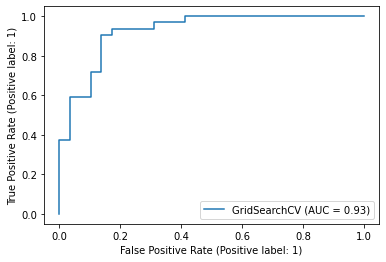

In [184]:
# Plot ROC curve and calculate AUC metrics

plot_roc_curve(gs_log_reg, X_test, y_test);

## Confusion matrix

In [185]:
# confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


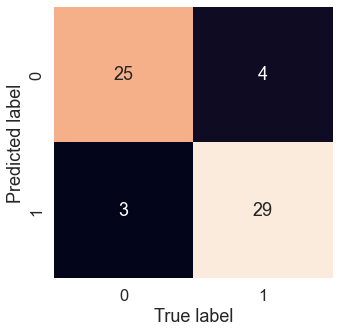

In [189]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax= plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot= True,
                    cbar= False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

` Now we've got ROC curve, an AUC metric and a confusion matrix, let's get a classificaton report as well as cross-validation, precison, recall and F1-score`

# Evaluating Our Model 2

**Classificaton Report**

In [191]:
print(classification_report(y_test, y_preds)) 
# Note is only done on only one split of our data

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Evaluating Our Model 3

## Calculate evaluation metirics using cross validation

`We're going to calculate precision, recall and f1-score of our model using corss-validation and to do so we'll be using **corss_vals_score**`

In [221]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20565123083486536, 'solver': 'liblinear'}

In [222]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20565123083486536,
                        solver = "liblinear")

In [223]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring= "accuracy")
#ctrl+shift+ - for cutting the cell

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [224]:
acc=np.mean(cv_acc)

In [225]:
# Cross validated Precision
cv_pres = cross_val_score(clf,
                         X,
                         y,
                         scoring="precision")
cv_pres

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [226]:
precision=np.mean(cv_pres)

In [227]:
# Cross-Validated recalll
cv_recall = cross_val_score(clf,X,y, scoring ="recall")
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [228]:
recall=np.mean(cv_recall)

In [229]:
# Cross-Validate f1 score

cv_f1= cross_val_score(clf,X,y, scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [230]:
f1=np.mean(cv_f1)

**Visualize cross_validated metrics** 

of mean

<AxesSubplot:title={'center':'Cross-validated Classification metrics'}>

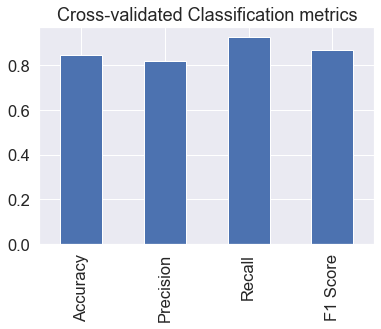

In [233]:
cv_merics= pd.DataFrame({"Accuracy": acc,
                        "Precision": precision,
                        "Recall": recall,
                        "F1 Score":f1},
                       index=[0])

cv_merics.T.plot.bar(title= "Cross-validated Classification metrics",
                    legend= False)

# Finding The Most Important Features

`Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute ?"`


Finding feature importance is different for each machine learnig model.

Let's find the feature importance for our LogisticRegression model..

In [236]:
# Fit an instance of logisticRegression

gs_log_reg.best_params_

clf = LogisticRegression(C=0.20565123083486536,
                        solver = "liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20565123083486536, solver='liblinear')

In [238]:
# check coef
clf.coef_

array([[ 0.00319408, -0.86266439,  0.66136689, -0.01157126, -0.00166584,
         0.04409684,  0.31372144,  0.02460091, -0.60548722, -0.56897571,
         0.45150948, -0.63682329, -0.67765878]])

In [241]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [240]:
# Match coef's of feature to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031940815776341225,
 'sex': -0.8626643885575526,
 'cp': 0.6613668871885502,
 'trestbps': -0.011571259108394972,
 'chol': -0.0016658449546624607,
 'fbs': 0.044096844265705794,
 'restecg': 0.3137214376770939,
 'thalach': 0.02460090893204839,
 'exang': -0.6054872231322187,
 'oldpeak': -0.5689757145118807,
 'slope': 0.4515094750995757,
 'ca': -0.6368232889782905,
 'thal': -0.6776587839962399}

`It tell us how each of the feature is important in order to predict actual label`

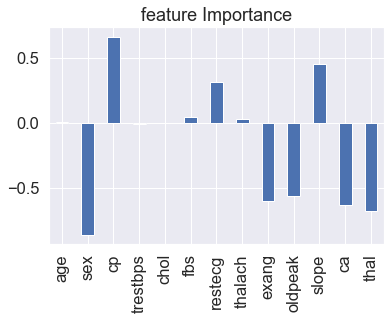

In [244]:
# Visualize feature importance
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="feature Importance", legend =False);

` This is known as the model driven Exploratory Data Analysis appraoch`

In [246]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


`Here it means the ratio goes down in negative correlation`

In [249]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# Reviewing The Project

## 6. Experimentation

If we dosen't fullis our evalution is it means that the work we have done so far we waste ?

No, It signifies that what things dosen't work.

`If you haven't hit your evaluation metric yet.. ask yourself..`

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could your improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?                                        